In [42]:
import pandas as pd

import numpy as np
from sklearn.metrics import roc_auc_score
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


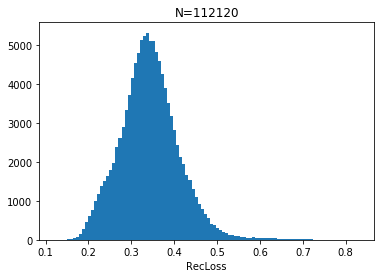

9552 112120
9552


In [43]:
PredDF = pd.read_csv("./model_predictions.csv")
ErrDF = pd.read_csv("./model/default32/RecLoss.csv")
plt.hist(ErrDF["RecLoss"],bins=100)
plt.xlabel("RecLoss")
plt.title("N=%d" % (len(ErrDF)))
plt.show()
print(len(PredDF),len(ErrDF))
MergeDF = pd.merge(PredDF,ErrDF,on="name")
print(len(MergeDF))

In [3]:
absmerr = np.mean(
    np.abs(
        MergeDF.filter(regex="label").as_matrix()-MergeDF.filter(regex="prediction").as_matrix()),axis=1)


MergeDF["AbsMeanErr"] = absmerr

/media/vince/anaconda3/envs/xray/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


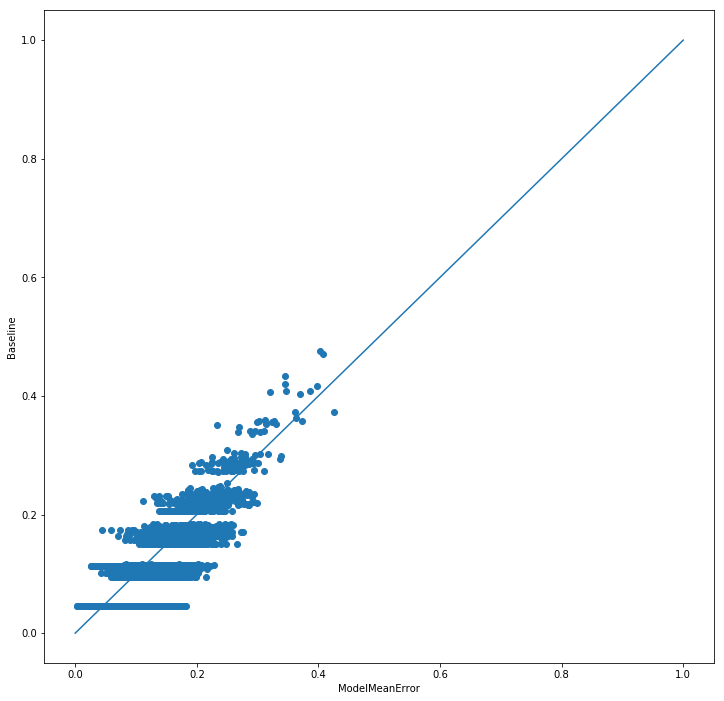

In [4]:
figsize(12,12)
subdf = MergeDF.filter(regex="label")
baseline = np.abs(subdf-subdf.mean()).mean(axis=1)
MergeDF["Baseline"] = baseline
plt.scatter(absmerr,baseline)
plt.xlabel("ModelMeanError")
plt.ylabel("Baseline")
plt.plot([0,1],[0,1])
plt.show()

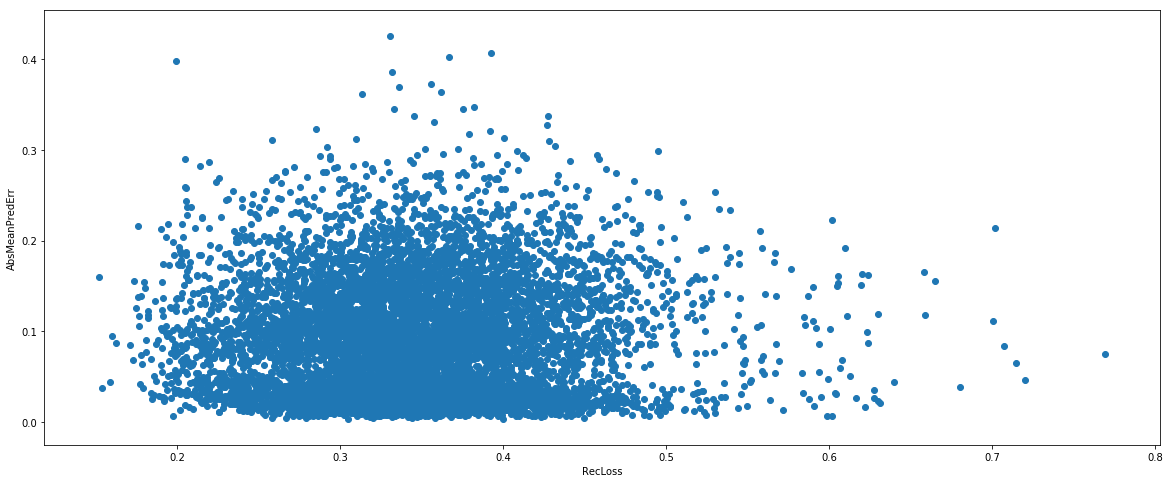

In [5]:
figsize(20,8)
rl = MergeDF["RecLoss"]
plt.scatter(rl,absmerr)
plt.xlabel("RecLoss")
plt.ylabel("AbsMeanPredErr")
plt.show()

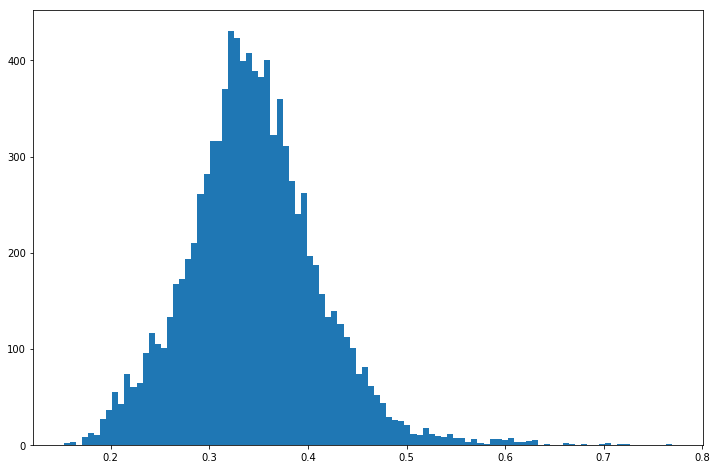

In [6]:
figsize(12,8)
plt.hist(MergeDF["RecLoss"],bins=100)
plt.show()

In [7]:
MergeDF.filter(regex="label").sum().sort_values()

label_13      11.0
label_8       90.0
label_4      135.0
label_5      137.0
label_6      140.0
label_10     190.0
label_9      246.0
label_3      292.0
label_1      331.0
label_12     394.0
label_11     551.0
label_7     1002.0
label_0     1060.0
label_2     1486.0
dtype: float64

array([0.4       , 0.40666667, 0.41333333, 0.42      , 0.42666667,
       0.43333333, 0.44      , 0.44666667, 0.45333333, 0.46      ,
       0.46666667, 0.47333333, 0.48      , 0.48666667, 0.49333333,
       0.5       , 0.50666667, 0.51333333, 0.52      , 0.52666667,
       0.53333333, 0.54      , 0.54666667, 0.55333333, 0.56      ,
       0.56666667, 0.57333333, 0.58      , 0.58666667, 0.59333333])

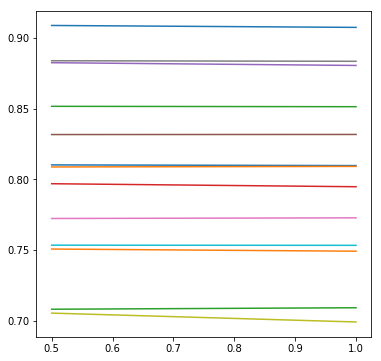

In [38]:
cutoff = (np.arange(30) / 300)  + 0.5
cutoff = list((np.arange(50) / 150)  + 0.35)
cutoff = [0.5,1]
AUCs = dict()
for i in range(13):
    AUCs[i] = dict()
    aucs = []
    cs = []
    N = []
    for c in cutoff:
        subdf = MergeDF[MergeDF["RecLoss"] < c]
        N.append(len(subdf))
        pred = subdf["prediction_"+str(i)]
        labe = subdf["label_"+str(i)]
        if np.sum(labe) < 10:
            continue
        auc = roc_auc_score(labe==1, pred)
        #print(i,c,"%.2f" % auc,len(subdf))
        AUCs[i][c] = auc
        aucs.append(auc)
        cs.append(c)
        
    plt.plot(cs,aucs)
    #break

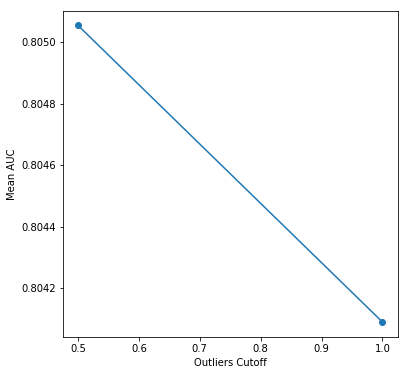

In [39]:
figsize(6,6)
m = pd.DataFrame(AUCs).dropna().mean(axis=1)
plt.plot(m.index,m.values,marker="o")
plt.xlabel("Outliers Cutoff")
plt.ylabel("Mean AUC")
plt.show()

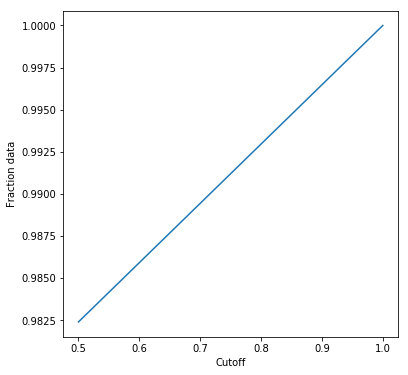

In [40]:
plt.plot(cutoff,np.array(N)/float(len(MergeDF)))
plt.xlabel("Cutoff")
plt.ylabel("Fraction data")
plt.show()

In [41]:
pd.DataFrame(AUCs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0.5,0.810325,0.808866,0.708078,0.796990,0.88272,0.831823,0.772366,0.884106,0.705333,0.753466,0.909098,0.750718,0.851827
1.0,0.809844,0.809262,0.709138,0.794859,0.88077,0.831887,0.772820,0.883719,0.699056,0.753344,0.907734,0.749186,0.851550
